# Prc_4 : Study and implement Naive_Bayes Classification

## Aim : To implement the Naive_Bayes Classifier on available dataset conclude the results in the form of graphs of accuracies.

### Importing Libraries

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import re
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## [1] Spam dataset

In [2]:
dataset1=pd.read_csv("D:\\Shubhamclassroom\\6th_Sem\\ml_lab\\prc4\\spam.csv")

In [3]:
dataset1

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
X=dataset1['Message']

In [5]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [6]:
X.isna().sum()

0

In [7]:
y=dataset1['Category']

In [8]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [9]:
y.isna().sum()

0

In [10]:
X.count()

5572

In [11]:
y.count()

5572

In [12]:
#change text lower cases and removal of white spaces
lower_text = []
for i in range(0,len(X)):
    s = str(X[i])
    s1 = s.strip()
    lower_text.append(s1.lower())

In [13]:
def remove_punctuation(test_str):
# Using filter() and lambda function to filter out punctuation characters
    result = ''.join(filter(lambda x: x.isalpha() or x.isdigit() or x.isspace(), test_str))
    return result

In [14]:
#Remove punctuation
punc_text = []
for i in range(0,len(lower_text)):
    s2 = (lower_text[i])
    s3 = remove_punctuation(s2)
    punc_text.append(s3)

In [15]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,max_df = 0.7,norm='l2', encoding='latin-1', ngram_range=(1, 2),stop_words='english')


In [16]:
X_tfidf = tfidf.fit_transform(punc_text)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=0)

In [18]:
clf = GaussianNB()

In [19]:
clf.fit(X_train.todense(), Y_train)

GaussianNB()

In [20]:
y_pred = clf.predict(X_test.todense())
y_pred[:50]

array(['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'spam'], dtype='<U4')

In [21]:
print("Confusion Matrix\n",confusion_matrix(Y_test,y_pred))
print("\n")
print("Classification Report\n",classification_report(Y_test,y_pred))
print("\n")
print("Accuracy : ",accuracy_score(Y_test,y_pred)*100)

Confusion Matrix
 [[400  81]
 [  7  70]]


Classification Report
               precision    recall  f1-score   support

         ham       0.98      0.83      0.90       481
        spam       0.46      0.91      0.61        77

    accuracy                           0.84       558
   macro avg       0.72      0.87      0.76       558
weighted avg       0.91      0.84      0.86       558



Accuracy :  84.22939068100358


In [22]:
accuracy1=accuracy_score(Y_test,y_pred)*100

In [23]:
accuracy1

84.22939068100358

## [2] Tennis dataset

In [24]:
dataset2=pd.read_csv("D:\\Shubhamclassroom\\6th_Sem\\ml_lab\\prc4\\tennisdata[1].csv")

In [25]:
dataset2.head()

,Outlook,Temperature,Humidity,Windy,PlayTennis
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes


In [26]:
dataset2['Outlook'].replace({"Sunny":0,"Overcast":1,"Rainy":2},inplace=True)
dataset2['Temperature'].replace({"Hot":0,"Mild":1,"Cool":2},inplace=True)
dataset2['Humidity'].replace({"High":0,"Normal":1},inplace=True)

In [27]:
dataset2['Windy'].replace({"False":0,"True":1},inplace=True)

In [28]:
dataset2.head()

,Outlook,Temperature,Humidity,Windy,PlayTennis
0,0,0,0,False,No
1,0,0,0,True,No
2,1,0,0,False,Yes
3,2,1,0,False,Yes
4,2,2,1,False,Yes


In [29]:
X = dataset2.iloc[:, :-1].values

In [30]:
X

array([[0, 0, 0, False],
       [0, 0, 0, True],
       [1, 0, 0, False],
       [2, 1, 0, False],
       [2, 2, 1, False],
       [2, 2, 1, True],
       [1, 2, 1, True],
       [0, 1, 0, False],
       [0, 2, 1, False],
       [2, 1, 1, False],
       [0, 1, 1, True],
       [1, 1, 0, True],
       [1, 0, 1, False],
       [2, 1, 0, True]], dtype=object)

In [31]:
y=dataset2['PlayTennis'].values

In [32]:
y

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [33]:
type(X)

numpy.ndarray

In [34]:
type(y)

numpy.ndarray

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
clf.fit(X_train, Y_train)

GaussianNB()

In [37]:
y_pred = clf.predict(X_test)
y_pred

array(['Yes', 'No', 'No', 'Yes'], dtype='<U3')

In [38]:
print("Confusion Matrix\n",confusion_matrix(Y_test,y_pred))
print("\n")
print("Classification Report\n",classification_report(Y_test,y_pred))
print("\n")
print("Accuracy : ",accuracy_score(Y_test,y_pred)*100)

Confusion Matrix
 [[1 0]
 [1 2]]


Classification Report
               precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



Accuracy :  75.0


In [39]:
accuracy2=accuracy_score(Y_test,y_pred)*100

In [40]:
accuracy2

75.0

## [3] Titanic dataset

In [41]:
dataset3=pd.read_csv("D:\\Shubhamclassroom\\6th_Sem\\ml_lab\\prc4\\titanic.csv")
dataset3.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [42]:
dataset3.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [43]:
dataset3 = dataset3.dropna()

In [44]:
dataset3.isna().sum()

PassengerId    0
Name           0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [45]:
dataset3['Sex'].replace({"male":1,"female":0},inplace=True)

In [46]:
dataset3['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [47]:
dataset3['Embarked'].replace({"C":1,"S":0,"Q":2},inplace=True)

In [48]:
dataset3

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,C85,1,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,C123,0,1
6,7,"McCarthy, Mr. Timothy J",1,1,54.0,0,0,17463,51.8625,E46,0,0
10,11,"Sandstrom, Miss. Marguerite Rut",3,0,4.0,1,1,PP 9549,16.7000,G6,0,1
11,12,"Bonnell, Miss. Elizabeth",1,0,58.0,0,0,113783,26.5500,C103,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,0,47.0,1,1,11751,52.5542,D35,0,1
872,873,"Carlsson, Mr. Frans Olof",1,1,33.0,0,0,695,5.0000,B51 B53 B55,0,0
879,880,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,0,56.0,0,1,11767,83.1583,C50,1,1
887,888,"Graham, Miss. Margaret Edith",1,0,19.0,0,0,112053,30.0000,B42,0,1


In [49]:
X=dataset3.iloc[:, 2:]

In [50]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1,1,0,38.0,1,0,PC 17599,71.2833,C85,1,1
3,1,0,35.0,1,0,113803,53.1000,C123,0,1
6,1,1,54.0,0,0,17463,51.8625,E46,0,0
10,3,0,4.0,1,1,PP 9549,16.7000,G6,0,1
11,1,0,58.0,0,0,113783,26.5500,C103,0,1
...,...,...,...,...,...,...,...,...,...,...
871,1,0,47.0,1,1,11751,52.5542,D35,0,1
872,1,1,33.0,0,0,695,5.0000,B51 B53 B55,0,0
879,1,0,56.0,0,1,11767,83.1583,C50,1,1
887,1,0,19.0,0,0,112053,30.0000,B42,0,1


In [51]:
X= X.drop('Ticket', axis=1)

In [52]:
X= X.drop('Cabin', axis=1)

In [53]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
1,1,0,38.0,1,0,71.2833,1,1
3,1,0,35.0,1,0,53.1000,0,1
6,1,1,54.0,0,0,51.8625,0,0
10,3,0,4.0,1,1,16.7000,0,1
11,1,0,58.0,0,0,26.5500,0,1
...,...,...,...,...,...,...,...,...
871,1,0,47.0,1,1,52.5542,0,1
872,1,1,33.0,0,0,5.0000,0,0
879,1,0,56.0,0,1,83.1583,1,1
887,1,0,19.0,0,0,30.0000,0,1


In [54]:
type(X)

pandas.core.frame.DataFrame

In [55]:
X=X.values

In [56]:
X

array([[ 1.    ,  0.    , 38.    , ..., 71.2833,  1.    ,  1.    ],
       [ 1.    ,  0.    , 35.    , ..., 53.1   ,  0.    ,  1.    ],
       [ 1.    ,  1.    , 54.    , ..., 51.8625,  0.    ,  0.    ],
       ...,
       [ 1.    ,  0.    , 56.    , ..., 83.1583,  1.    ,  1.    ],
       [ 1.    ,  0.    , 19.    , ..., 30.    ,  0.    ,  1.    ],
       [ 1.    ,  1.    , 26.    , ..., 30.    ,  1.    ,  1.    ]])

In [57]:
y=dataset3["Survived"]

In [58]:
y=y.values

In [59]:
type(X)

numpy.ndarray

In [60]:
type(y)

numpy.ndarray

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [62]:
clf.fit(X_train, Y_train)

GaussianNB()

In [63]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0], dtype=int64)

In [64]:
print("Confusion Matrix\n",confusion_matrix(Y_test,y_pred))
print("\n")
print("Classification Report\n",classification_report(Y_test,y_pred))
print("\n")
print("Accuracy : ",accuracy_score(Y_test,y_pred)*100)

Confusion Matrix
 [[18  0]
 [ 0 28]]


Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        28

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



Accuracy :  100.0


In [65]:
accuracy3=accuracy_score(Y_test,y_pred)*100

In [66]:
accuracy3

100.0

## Plotting accuracies obtained from various dataset

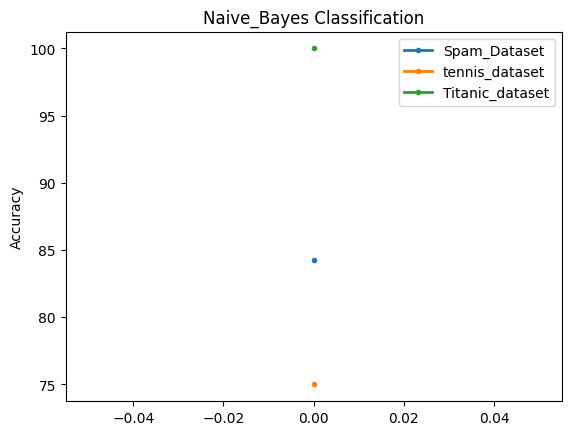

In [67]:
plt.title('Naive_Bayes Classification')
plt.plot(accuracy1,linewidth=2, marker ='.', label = 'Spam_Dataset')
plt.plot(accuracy2,linewidth=2, marker ='.', label = 'tennis_dataset')
plt.plot(accuracy3,linewidth=2, marker ='.', label = 'Titanic_dataset')
plt.legend()
plt.ylabel('Accuracy')
plt.show()


In [68]:
accuracy=[]

In [69]:
accuracy.append(accuracy1)
accuracy.append(accuracy2)
accuracy.append(accuracy3)

In [70]:
accuracy

[84.22939068100358, 75.0, 100.0]

In [71]:
accuracy_tag=['Spam_dataset','Tennis_dataset','Titanic_dataset']

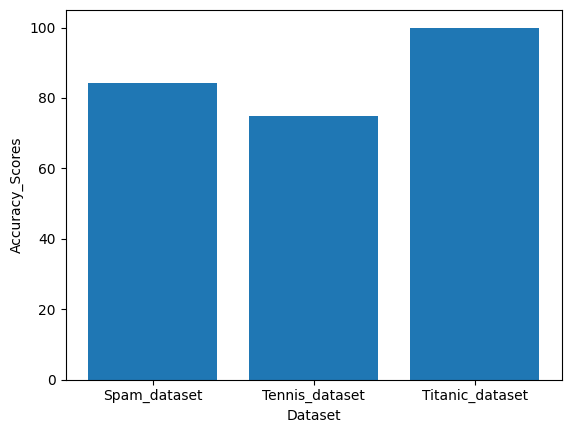

In [72]:
# Marks of RAM in different subjects out of 100.
x = accuracy_tag
y = accuracy

plt.bar(x, y)
plt.xlabel("Dataset")
plt.ylabel("Accuracy_Scores")
#plt.yticks([]) # Command for hiding y-axis

plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

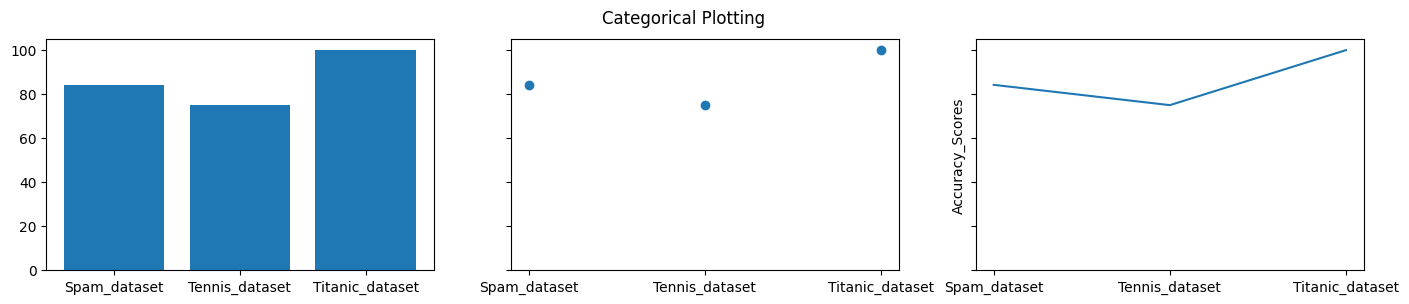

In [73]:
names=accuracy_tag
values=accuracy
fig, axs = plt.subplots(1, 3, figsize=(17, 3), sharey=True)
plt.ylabel("Accuracy_Scores")
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

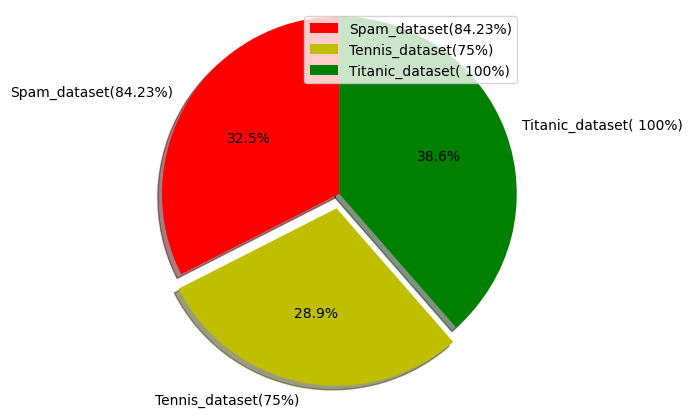

In [74]:
import matplotlib.pyplot as plt

# defining labels
activities = ['Spam_dataset(84.23%)', 'Tennis_dataset(75%)', 'Titanic_dataset( 100%)']

# portion covered by each label
slices = accuracy

# color for each label
colors = ['r', 'y', 'g']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0.1, 0),
        radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

# showing the plot
plt.show()


## Result : I have sucesfully applied the Naive_Bayes model for given various datasets. Also draw the accuracy graph for different dataset. From this I have observed that Titanic dataset works very fine with Naive_Bayes Algorithm which gives maximum score of 100% accuracy.